# Fase 2: Visualización

Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes preguntas usando el tipo de gráfica que consideres más adecuado (podéis ponerle fantasía a las gráficas ;-):

1.	¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
2.	¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?
3.	¿Cuál es la distribución de los clientes por provincia o estado?
4.	¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
5.	¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
6.	¿Cómo se distribuyen los clientes según su estado civil y género?


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [9]:
df_information = pd.read_csv("csv/customer_information_airline.csv", index_col = 0)
df_information.head(20)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
5,100018,2017,6,4,1,5,4330,433.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
6,100018,2017,7,10,0,10,3870,387.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
7,100018,2017,9,9,4,13,1651,165.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
8,100018,2017,8,10,5,15,4200,420.0,690,56,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
9,100018,2017,10,6,0,6,1032,103.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


In [10]:
df_information.info()

<class 'pandas.core.frame.DataFrame'>
Index: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty_number               405624 non-null  int64  
 1   year                         405624 non-null  int64  
 2   month                        405624 non-null  int64  
 3   flights_booked               405624 non-null  int64  
 4   flights_with_companions      405624 non-null  int64  
 5   total_flights                405624 non-null  int64  
 6   distance                     405624 non-null  int64  
 7   points_accumulated           405624 non-null  float64
 8   points_redeemed              405624 non-null  int64  
 9   dollar_cost_points_redeemed  405624 non-null  int64  
 10  country                      405624 non-null  object 
 11  province                     405624 non-null  object 
 12  city                         405624 non-null  object 
 13  post

##### 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?


In [ ]:
# identificamos que las variables que necesitamos son :
   # year tenemos 2 años 2017 y 2018
   # month
   # flights_booked

#son variables numericas


In [17]:
#filtramos el data frame por año 2017
df_2017 = df_information[df_information['year'] == 2017][["year", 'month', 'flights_booked']]
df_2017


,year,month,flights_booked
0,2017,1,3
1,2017,2,2
3,2017,4,4
4,2017,5,0
5,2017,6,4
...,...,...,...
405607,2017,8,0
405608,2017,9,0
405609,2017,10,0
405610,2017,11,0


In [47]:
# agrupamos vuelos reservados por mes 
vuelos_reservados_mes_2017 = df_2017.groupby("month")["flights_booked"].sum().reset_index()
vuelos_reservados_mes_2017

,month,flights_booked
0,1,47766
1,2,47691
2,3,64271
3,4,55720
4,5,65279
5,6,80493
6,7,89288
7,8,78692
8,9,63304
9,10,60351


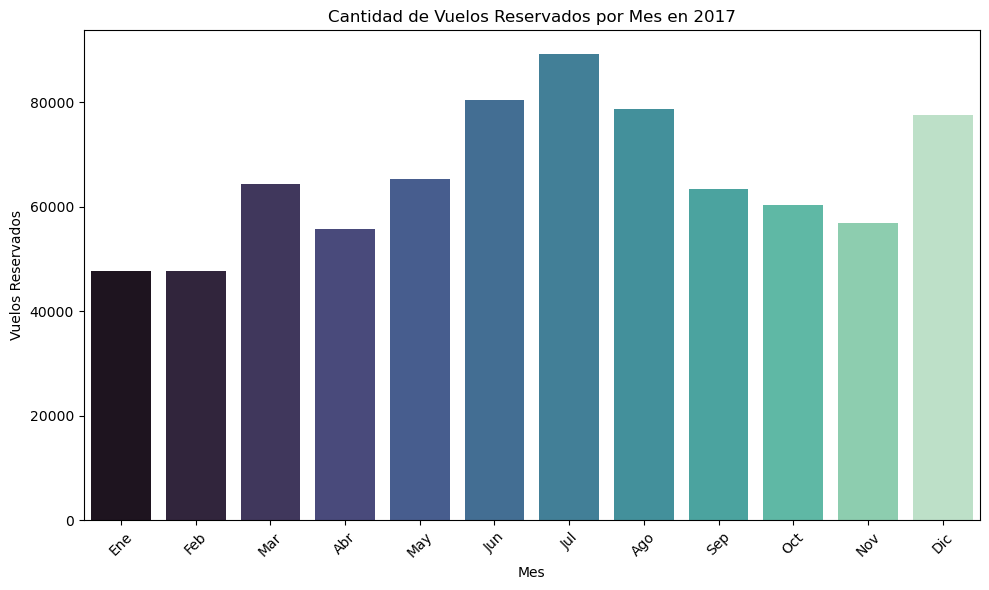

In [48]:

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='month', 
            y='flights_booked',
            data=vuelos_reservados_mes_2017,
            palette='mako')

# Añadimos etiquetas y título
plt.title('Cantidad de Vuelos Reservados por Mes en 2017')
plt.xlabel('Mes')
plt.ylabel('Vuelos Reservados')

# Añadimos etiquetas de los meses
plt.xticks(ticks=range(12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [49]:
#filtramos el data frame por año 2018
df_2018 = df_information[df_information['year'] == 2018][["year", 'month', 'flights_booked']]
df_2018

,year,month,flights_booked
2,2018,10,6
12,2018,1,1
14,2018,3,7
15,2018,2,6
16,2018,4,5
...,...,...,...
405619,2018,8,0
405620,2018,9,0
405621,2018,10,0
405622,2018,11,0


In [50]:
#filtramos el data frame por año 2018
vuelos_reservados_mes_2018 = df_2018.groupby("month")["flights_booked"].sum().reset_index()
vuelos_reservados_mes_2018

,month,flights_booked
0,1,49170
1,2,48643
2,3,66928
3,4,56791
4,5,76891
5,6,92749
6,7,104143
7,8,90512
8,9,73075
9,10,69110


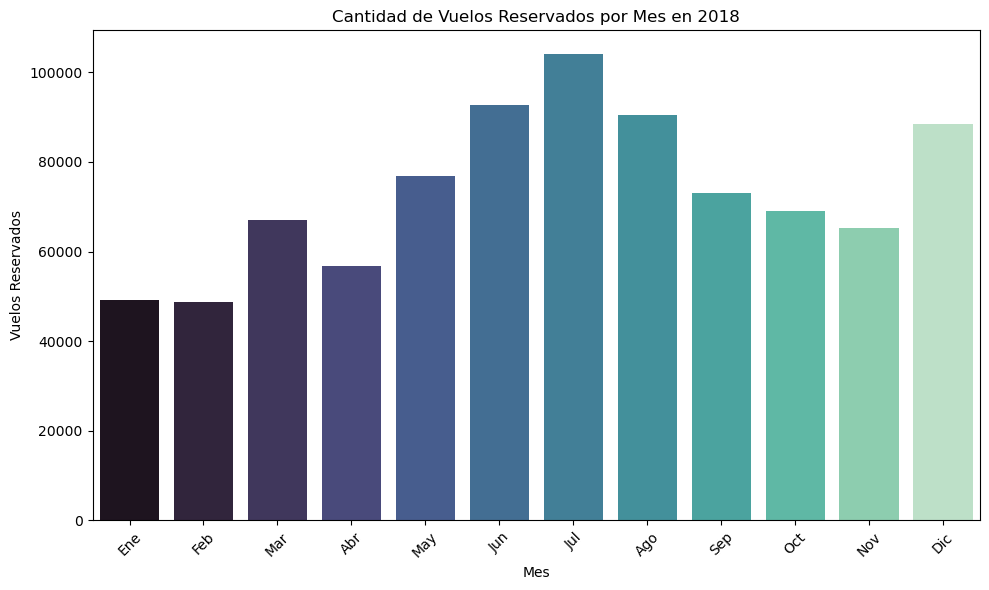

In [51]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='month', 
            y='flights_booked',
            data= vuelos_reservados_mes_2018,
            palette='mako')

# Añadimos etiquetas y título
plt.title('Cantidad de Vuelos Reservados por Mes en 2018')
plt.xlabel('Mes')
plt.ylabel('Vuelos Reservados')

# Añadimos etiquetas de los meses
plt.xticks(ticks=range(12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

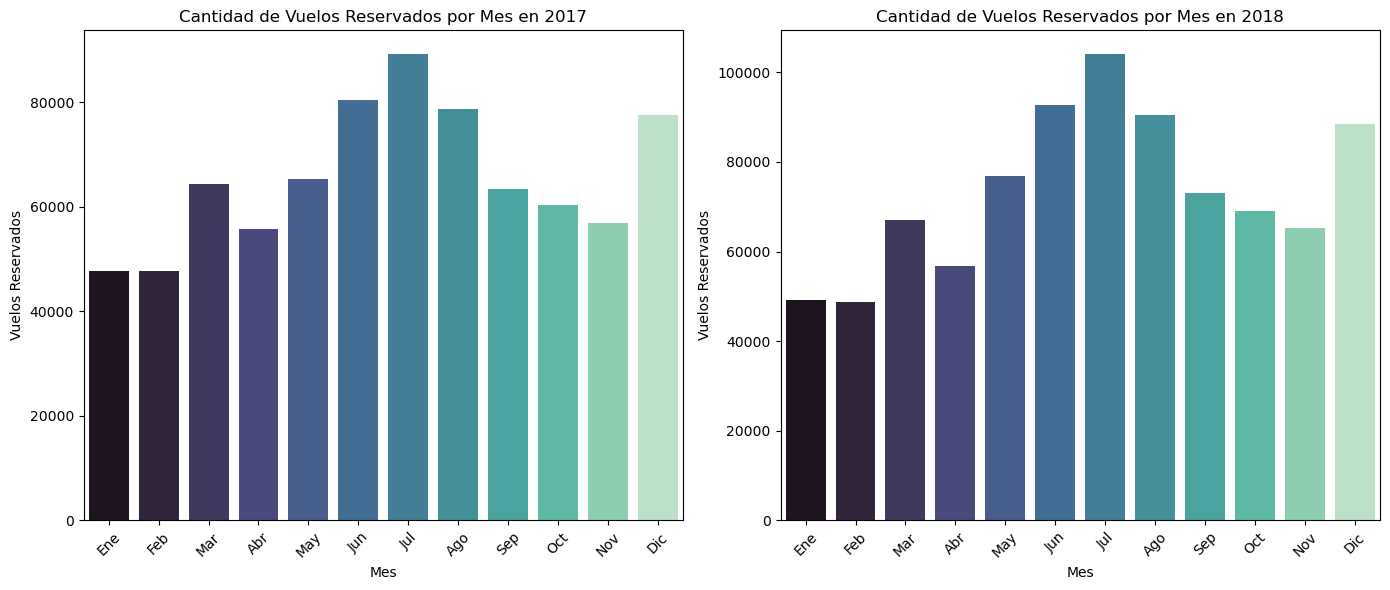

In [52]:
# como ya tengo los 2 graficos de 2017 y 2018 ahora quiero compararlos

# Crear las subgráficas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Gráfico para 2017
sns.barplot(x='month', y='flights_booked', data= vuelos_reservados_mes_2017, ax=axes[0], palette='mako')
axes[0].set_title('Cantidad de Vuelos Reservados por Mes en 2017')
axes[0].set_xlabel('Mes')
axes[0].set_ylabel('Vuelos Reservados')
axes[0].set_xticks(range(12))
axes[0].set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
                         'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=45)

# Gráfico para 2018
sns.barplot(x='month', y='flights_booked', data= vuelos_reservados_mes_2018, ax=axes[1], palette='mako')
axes[1].set_title('Cantidad de Vuelos Reservados por Mes en 2018')
axes[1].set_xlabel('Mes')
axes[1].set_ylabel('Vuelos Reservados')
axes[1].set_xticks(range(12))
axes[1].set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
                         'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=45)

# Ajustar el diseño
plt.tight_layout()
plt.show()


Se observa que los vuelos reservados por mes tanto para 2017 como para 2018 tienen un aumento en los meses de verano junio, julio y agosto, y final de año en diciembre ambas graficas son bastante similares pero se oberva un repunte de reservas en el año 2018.

### 2.	¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?